# Computer Assignment 0

# 1

The head (n) function is used to access the first n rows of a dataframe or series. It returns a smaller version of the caller object with the first few entries.The default value of n is 5.


The tail(n) function is used to get the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.


The Describe function returns the statistical summary of the dataframe or series. This includes count, mean, median (or 50th percentile) standard variation, min-max, and percentile values of columns. To perform this function, chain . describe() to the dataframe or series.


The info() method prints information about the DataFrame.
The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [25]:
import pandas
initial_data = pandas.read_csv('train.csv')
print("head() :\n")
print(initial_data.head())
print("\n\ntail() :\n")
print(initial_data.tail())
print("\n\ndescribe() :\n")
print(initial_data.describe())
print("\n\ninfo() :\n")
print(initial_data.info())

head() :

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

# 2

In [26]:
initial_data['Sex'] = initial_data['Sex'].astype('category').cat.codes
print(initial_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int8   
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB
None


In [27]:
initial_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3

Most of the Cabin's cells was NaN so I deleted whole column.I used mean for Age and the most frequent data for Embarked because it wasnt a numerical value.


In [28]:
initial_data.drop(['Cabin'], axis=1, inplace=True)
initial_data['Age'].fillna(value = initial_data.Age.mean(), inplace = True)
initial_data = initial_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
initial_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

disadvantages:

It reduces the variance.
Mean imputation does not preserve the relationships among variables.
Mean Imputation Leads to An Underestimate of Standard Errors.

advantages:

Its easy to use.

# 4

Name and passengerId have unique vlaues for each cells so I deleted those columns.

In [29]:
initial_data.drop(['Name'], axis=1, inplace=True)
initial_data.drop(['PassengerId'], axis=1, inplace=True)

# 5

In [32]:
print("number of men:")
print(initial_data['Sex'].value_counts()[0])
print("number of women:")
print(initial_data['Sex'].value_counts()[1])
filt = (initial_data['Sex']==0) & (initial_data['Embarked'].str.contains('S'))
initial_data[filt]
print("number of men with embarked=Southampton:")
initial_data[filt].shape[0]

number of men:
314
number of women:
577
number of men with embarked=Southampton:


205

# 6

In [34]:
f = (initial_data['Age']>35)&(initial_data['Pclass']==3)&(initial_data['SibSp']==0)&(initial_data['Parch']==0)
initial_data[f]
initial_data[f].shape[0]

41

# 7

In [37]:
import time
start = time.time()
print(initial_data[initial_data['Embarked']=='Q'].Fare.mean())
print(f"Executed in {time.time() - start} seconds")

13.276029870129872
Executed in 0.002988576889038086 seconds


# 8

As we can see, using loop will take longer time than vectorization to execute.

In [38]:
count_ = 0
sum_ = 0
start = time.time()
for index,row in initial_data.iterrows():
    if row['Embarked'] == 'Q':
        sum_ += row['Fare']
        count_ += 1
print(sum_ / count_)
print(f"Executed in {time.time() - start} seconds")

13.276029870129872
Executed in 0.12821626663208008 seconds


# 9

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

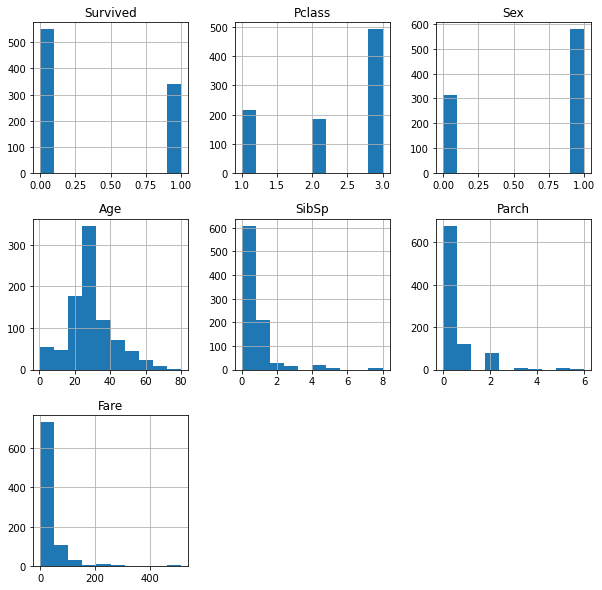

In [39]:
initial_data.hist(column=['Survived','Pclass','Sex','Age',
                          'SibSp','Parch','Fare'],figsize=(10,10))

# 10

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

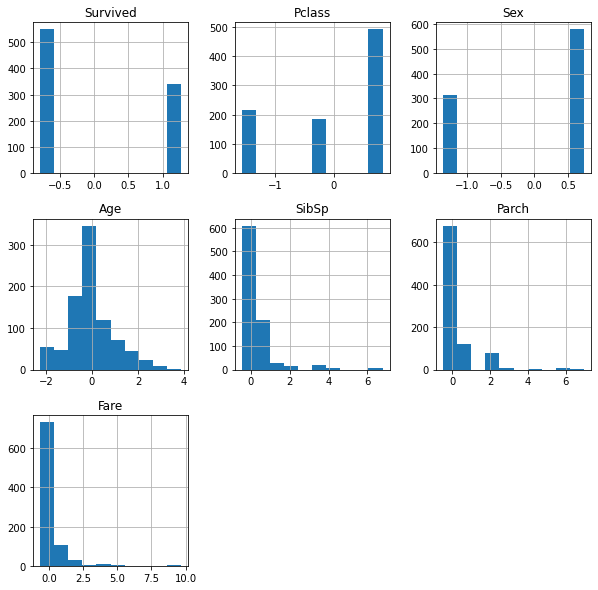

In [40]:
normalized_data = initial_data
normalized_data['Survived'] = (initial_data['Survived']-initial_data['Survived'].mean())/initial_data['Survived'].std()
normalized_data['Pclass'] = (initial_data['Pclass']-initial_data['Pclass'].mean())/initial_data['Pclass'].std()
normalized_data['Sex'] = (initial_data['Sex']-initial_data['Sex'].mean())/initial_data['Sex'].std()
normalized_data['Age'] = (initial_data['Age']-initial_data['Age'].mean())/initial_data['Age'].std()
normalized_data['SibSp'] = (initial_data['SibSp']-initial_data['SibSp'].mean())/initial_data['SibSp'].std()
normalized_data['Parch'] = (initial_data['Parch']-initial_data['Parch'].mean())/initial_data['Parch'].std()
normalized_data['Fare'] = (initial_data['Fare']-initial_data['Fare'].mean())/initial_data['Fare'].std()

normalized_data.hist(column=['Survived','Pclass','Sex','Age',
                          'SibSp','Parch','Fare'],figsize=(10,10))